# Pandas demo

In [1]:
import pandas as pd

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 18

### pandas provides 1D Series, 2D DataFrame, 3D Panel

In [3]:
t = np.arange(0.0, 1.0, 0.1)
s = pd.Series(t)

In [4]:
x = t + np.random.normal(scale=0.1, size=t.shape)
y = x**2 + np.random.normal(scale=0.5, size=t.shape)
df1 = pd.DataFrame({'x': x, 'y': y})

### All pandas objects are indexed

In [5]:
s

0    0.0
1    0.1
2    0.2
3    0.3
4    0.4
5    0.5
6    0.6
7    0.7
8    0.8
9    0.9
dtype: float64

In [6]:
df1

,x,y
0,0.026546,0.974583
1,0.026272,0.279982
2,0.290480,0.005652
3,0.303874,-0.008661
4,0.450882,0.021970
5,0.554871,0.230146
6,0.482618,0.303097
7,0.736636,0.538058
8,0.839977,0.968533
9,0.849706,0.371357


### Sometimes it makes sense to use another variable as the index

In [7]:
df1 = pd.DataFrame({'x': x, 'y': y}, index=t)
df1

,x,y
0.0,0.026546,0.974583
0.1,0.026272,0.279982
0.2,0.290480,0.005652
0.3,0.303874,-0.008661
0.4,0.450882,0.021970
0.5,0.554871,0.230146
0.6,0.482618,0.303097
0.7,0.736636,0.538058
0.8,0.839977,0.968533
0.9,0.849706,0.371357


In [8]:
df1 = df1.rename_axis('t')
df1

,x,y
t,,
0.0,0.026546,0.974583
0.1,0.026272,0.279982
0.2,0.290480,0.005652
0.3,0.303874,-0.008661
0.4,0.450882,0.021970
0.5,0.554871,0.230146
0.6,0.482618,0.303097
0.7,0.736636,0.538058
0.8,0.839977,0.968533


In [9]:
df1 = df1.rename_axis('vars', axis='columns')
df1

vars,x,y
t,,
0.0,0.026546,0.974583
0.1,0.026272,0.279982
0.2,0.290480,0.005652
0.3,0.303874,-0.008661
0.4,0.450882,0.021970
0.5,0.554871,0.230146
0.6,0.482618,0.303097
0.7,0.736636,0.538058
0.8,0.839977,0.968533


In [10]:
df1 = pd.DataFrame({'t': t, 'x': x, 'y': y})
df1 = df1.set_index('t')
df1 = df1.rename_axis('vars', axis='columns')
df1

vars,x,y
t,,
0.0,0.026546,0.974583
0.1,0.026272,0.279982
0.2,0.290480,0.005652
0.3,0.303874,-0.008661
0.4,0.450882,0.021970
0.5,0.554871,0.230146
0.6,0.482618,0.303097
0.7,0.736636,0.538058
0.8,0.839977,0.968533


Note that most operations on a DataFrame return a new DataFrame, rather than changing the existing one.

This is generally done in a clever way, so it is still efficient.

If you want to make a change to the original, you can use the argument ```inplace=True```.

### Sorting

In [11]:
df1.sort_values('y')

vars,x,y
t,,
0.3,0.303874,-0.008661
0.2,0.290480,0.005652
0.4,0.450882,0.021970
0.5,0.554871,0.230146
0.1,0.026272,0.279982
0.6,0.482618,0.303097
0.9,0.849706,0.371357
0.7,0.736636,0.538058
0.8,0.839977,0.968533


Use ```.sort_index``` to sort on the index.

### Plot directly from pandas

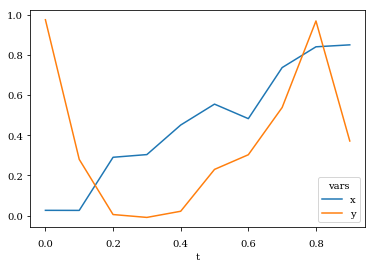

In [12]:
ax = df1.plot()
ax.set_xlabel('t');

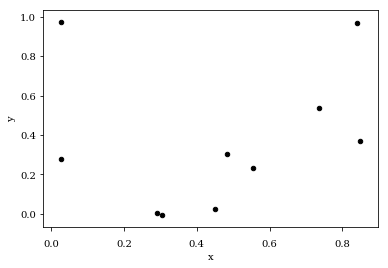

In [13]:
df1.plot('x', 'y', 'scatter');

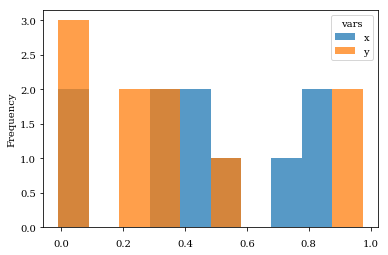

In [14]:
df1.plot(kind='hist', alpha=0.75);

### Accessing data

Get columns by slicing dataframe

In [15]:
df1['x']

t
0.0    0.026546
0.1    0.026272
0.2    0.290480
0.3    0.303874
0.4    0.450882
0.5    0.554871
0.6    0.482618
0.7    0.736636
0.8    0.839977
0.9    0.849706
Name: x, dtype: float64

Get rows by slicing ```.loc``` using index, or ```.iloc``` using integer position

In [16]:
df1.loc[0.1:0.5]

vars,x,y
t,,
0.1,0.026272,0.279982
0.2,0.290480,0.005652
0.3,0.303874,-0.008661
0.4,0.450882,0.021970
0.5,0.554871,0.230146


In [17]:
df1.iloc[1:5]

vars,x,y
t,,
0.1,0.026272,0.279982
0.2,0.290480,0.005652
0.3,0.303874,-0.008661
0.4,0.450882,0.021970


### Joining tables uses the index

In [18]:
t2 = t[::2]
z = t2**3 + np.random.normal(scale=1.0, size=t2.shape)

In [19]:
df2 = pd.DataFrame({'z' :z, 'z2': z**2}, index=t2)
df2

,z,z2
0.0,-0.402931,0.162353
0.2,0.382266,0.146128
0.4,1.749255,3.059892
0.6,-0.961371,0.924235
0.8,1.305686,1.704816


In [20]:
df3 = df1.join(df2)
df3

,x,y,z,z2
t,,,,
0.0,0.026546,0.974583,-0.402931,0.162353
0.1,0.026272,0.279982,NaN,NaN
0.2,0.290480,0.005652,0.382266,0.146128
0.3,0.303874,-0.008661,NaN,NaN
0.4,0.450882,0.021970,1.749255,3.059892
0.5,0.554871,0.230146,NaN,NaN
0.6,0.482618,0.303097,-0.961371,0.924235
0.7,0.736636,0.538058,NaN,NaN
0.8,0.839977,0.968533,1.305686,1.704816
